# Анализ продаж маркет плейса Amazon

[Текст ссылки](https://)# Загрузка данных

Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

## 1. Первичная обработка данных
### 1.1. Загрузка датасета

In [12]:
#Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Настройка отображения данных
pd.set_option("display.max_columns", None)  # Показывать все столбцы
pd.set_option("display.max_rows", 20)       # Ограничить количество строк для отображения
pd.set_option("display.float_format", "{:.2f}".format)  # Формат чисел: 2 знака после запятой
pd.set_option("display.width", 1000)        # Увеличить ширину вывода для удобства
df = pd.read_csv('/content/drive/MyDrive/Zerocoder/01_Профессии/01_Pyhton для Аналитиков данных/Pynton PN/PN14 Проект в портфолио/amazon_market_data.csv')

In [13]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [15]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.90,4,0.20,8.56
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.43,11,0.00,199.26
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.60,2,0.00,1.73
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.56,5,0.20,-107.96
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.42,5,0.60,-187.38


### 1.2 Приведение столбцов к стилю camel_case

In [16]:
import pandas as pd
import re

# Предполагаем, что датафрейм df уже загружен

def to_camel_case(column_name):
    # Разбиваем строку на слова
    words = re.findall(r'[A-Za-z0-9]+', column_name)

    # Приводим первое слово к нижнему регистру, остальные - с заглавной буквы
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# Применяем функцию to_camel_case ко всем названиям столбцов
df.columns = [to_camel_case(col) for col in df.columns]

# Выводим новые названия столбцов
print("Новые названия столбцов:")
print(df.columns.tolist())

Новые названия столбцов:
['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment', 'country', 'city', 'state', 'postalCode', 'region', 'productId', 'category', 'subCategory', 'productName', 'sales', 'quantity', 'discount', 'profit']


### 1.3 Приведение типов данных

In [17]:
# Преобразуем столбец 'orderDate' в формат datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Проверяем результат
print(df['orderDate'].dtype)
print(df['orderDate'].head())

datetime64[ns]
0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: orderDate, dtype: datetime64[ns]


<ipython-input-17-756039129>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['orderDate'] = pd.to_datetime(df['orderDate'])


In [18]:
df.columns

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment', 'country', 'city', 'state', 'postalCode', 'region', 'productId', 'category', 'subCategory', 'productName', 'sales', 'quantity', 'discount', 'profit'], dtype='object')

### 1.4 Поиск дублей и пропусков в данных

In [19]:
def analyze_data(df):
    # Поиск дублей
    duplicates = df.duplicated().sum()
    print(f"Полных дубликатов строк: {duplicates}")

    # Поиск пропусков
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("\nПропущенные значения:")
        print(missing[missing > 0])
    else:
        print("\nПропущенные значения отсутствуют.")

# Пример использования функции
analyze_data(df)






Полных дубликатов строк: 0

Пропущенные значения отсутствуют.


Вывод:
---
Данные имеют высокое качество:




* Нет дублей — данные уникальны.

* Нет пропусков — данные полные и готовы к анализу.

Эти характеристики позволяют сразу перейти к более сложным этапам анализа, таким как исследование трендов, сегментация клиентов или анализ прибыльности.

## 2. Исследовательский анализ данных

In [20]:
df

,orderDate,rowId,orderId,shipMode,customerId,segment,country,city,state,postalCode,region,productId,category,subCategory,productName,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.90,4,0.20,8.56
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.43,11,0.00,199.26
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.60,2,0.00,1.73
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.56,5,0.20,-107.96
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.42,5,0.60,-187.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.93,7,0.00,2.73
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.78,3,0.20,19.79
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.72,2,0.20,6.47


## 2.1 Подсчет количества уникальных заказов

In [21]:
# Подсчет количества уникальных заказов
unique_orders = df['orderId'].nunique()
print(f"Количество уникальных заказов: {unique_orders}")

Количество уникальных заказов: 1687


### 2.2 Подсчет уникальных клиентов



In [22]:
# Подсчет количества уникальных клиентов
unique_orders = df['customerId'].nunique()
print(f"Количество уникальных клиентов: {unique_orders}")

Количество уникальных клиентов: 693


### 2.3. Обзор локации пользователей


Данные по странам:
country
United States    3312


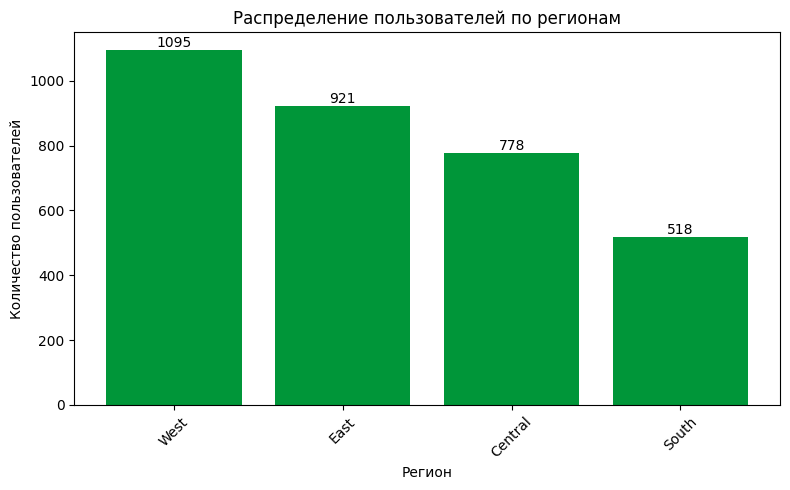

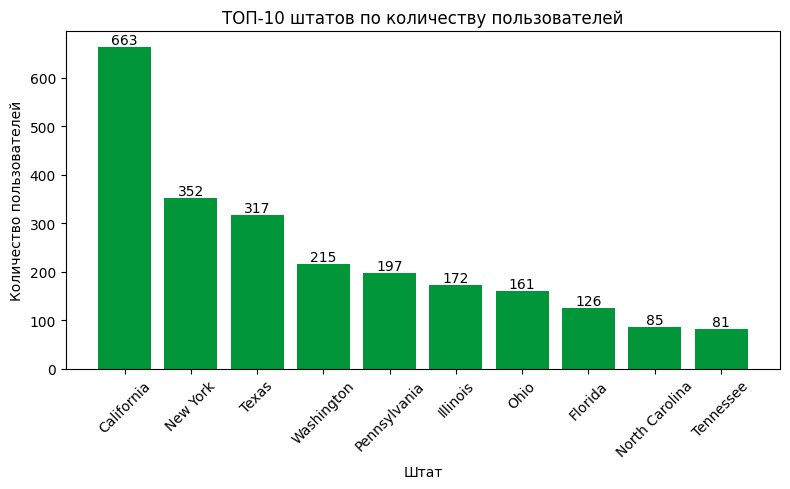


Данные по штатам:
state
California        663
New York          352
Texas             317
Washington        215
Pennsylvania      197
Illinois          172
Ohio              161
Florida           126
North Carolina     85
Tennessee          81
Arizona            70
Michigan           67
Georgia            62
Indiana            61
Colorado           61
Kentucky           51
New Jersey         43
Virginia           43
Massachusetts      39
Minnesota          38
Name: count, dtype: int64


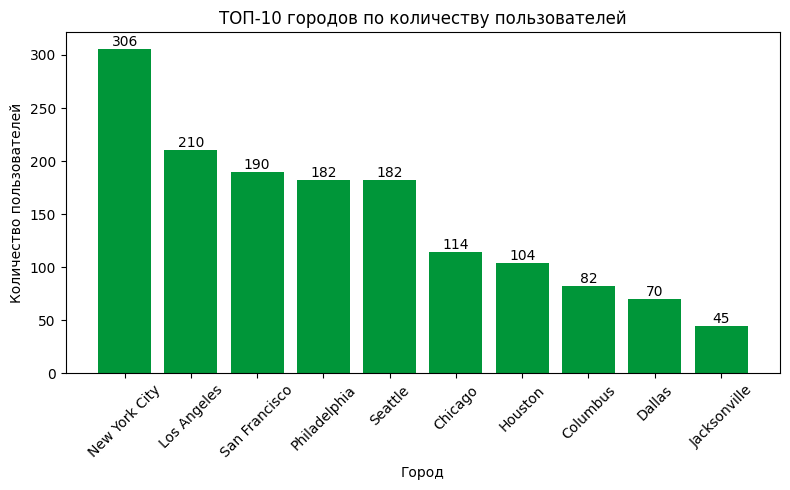


Данные по городам:
city
New York City    306
Los Angeles      210
San Francisco    190
Philadelphia     182
Seattle          182
Chicago          114
Houston          104
Columbus          82
Dallas            70
Jacksonville      45
Springfield       45
Richmond          42
San Diego         33
Detroit           29
Louisville        28
Fairfield         26
Jackson           26
Milwaukee         24
Rochester         24
Lakewood          24
Name: count, dtype: int64


In [23]:
# Группировка данных по странам
country_counts = df['country'].value_counts()

# Группировка данных по регионам
region_counts = df['region'].value_counts()

# Группировка данных по штатам
state_counts = df['state'].value_counts().sort_values(ascending=False)

# Группировка данных по городам
city_counts = df['city'].value_counts().sort_values(ascending=False)

# Вывод данных по странам
print("\nДанные по странам:")
print(country_counts.to_string())  # Вывод всех строк


# Построение графиков

# График: распределение пользователей по регионам
plt.figure(figsize=(8, 5))
bars = plt.bar(region_counts.index, region_counts.values, color='#009639')
plt.title('Распределение пользователей по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# График: ТОП-10 штатов
state_counts_top10 = state_counts.head(10)
plt.figure(figsize=(8, 5))
bars = plt.bar(state_counts_top10.index, state_counts_top10.values, color='#009639')
plt.title('ТОП-10 штатов по количеству пользователей')
plt.xlabel('Штат')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

print("\nДанные по штатам:")
print(state_counts.head(20))


# График: ТОП-10 городов
city_counts_top10 = city_counts.head(10)
plt.figure(figsize=(8, 5))
bars = plt.bar(city_counts_top10.index, city_counts_top10.values, color='#009639')
plt.title('ТОП-10 городов по количеству пользователей')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

print("\nДанные по городам:")
print(city_counts.head(20))

**Анализ распределения пользователей: Amazon**

*1. Распределение пользователей по странам
Все пользователи находятся в United States (3312 записей).

Это подтверждает, что текущий анализ охватывает только американский рынок.

*2. Распределение пользователей по регионам
West — лидер по количеству пользователей (1095), что составляет 33% от общего числа.

East — второй регион с 921 пользователем (28%).

Central и South занимают третье и четвёртое места с 778 и 518 пользователями соответственно.

Вывод:
Наибольшая концентрация пользователей наблюдается в западном регионе, что может быть связано с плотностью населения и экономической активностью.


*3. ТОП-10 штатов по количеству пользователей
California уверенно лидирует с 663 пользователями (20% от общего числа).

New York и Texas занимают второе и третье места с 352 и 317 пользователями соответственно.

Остальные штаты, такие как Washington, Pennsylvania, и Illinois, имеют значительное, но меньшее количество пользователей.

Вывод:
Калифорния — ключевой штат для бизнеса Amazon, что связано с высокой плотностью населения и развитой инфраструктурой.


*4. ТОП-10 городов по количеству пользователей
New York City — абсолютный лидер (306 пользователей).

За ним следуют Los Angeles (210) и San Francisco (190).

Остальные города, такие как Philadelphia, Seattle, и Chicago, также входят в топ, но значительно уступают лидерам.


**Вывод:**

Крупные мегаполисы, такие как Нью-Йорк и Лос-Анджелес, являются основными точками активности пользователей Amazon.

Рекомендации
Увеличить маркетинговую активность в регионах с меньшей концентрацией пользователей, таких как South.

Усилить логистическую инфраструктуру в ключевых штатах (California, Texas) для улучшения клиентского опыта.

Провести дополнительный анализ городов-лидеров для выявления специфики потребностей их жителей.

Этот анализ предоставляет чёткое понимание географического распределения пользователей Amazon и может быть использован для стратегического планирования.

### 2.4 Анализ динамики заказов

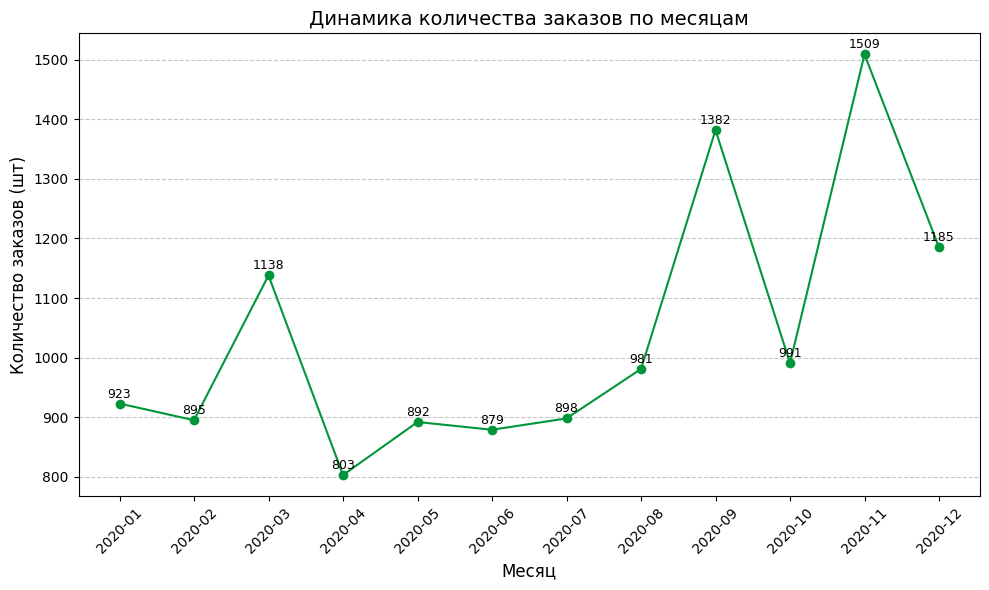


Транспонированная таблица (Количество заказов):
     0       1       2       3       4       5       6       7       8       9       10      11
2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08 2020-09 2020-10 2020-11 2020-12
    923     895    1138     803     892     879     898     981    1382     991    1509    1185


In [24]:
# Группировка данных по месяцам и суммирование количества заказов
quantity_monthly_counts = df.groupby(df['orderDate'].dt.to_period('M'))['quantity'].sum()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(quantity_monthly_counts.index.astype(str), quantity_monthly_counts.values, color='#009639', marker='o')
plt.title('Динамика количества заказов по месяцам', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество заказов (шт)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Добавление подписей к точкам
for i, value in enumerate(quantity_monthly_counts.values):
    plt.text(quantity_monthly_counts.index.astype(str)[i], value + 5, f'{value}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Создание таблицы для представления данных
quantity_table = pd.DataFrame({
    'Месяц': quantity_monthly_counts.index.astype(str),
    'Количество заказов (шт)': quantity_monthly_counts.values
})

# Вывод транспонированной таблицы
print("\nТранспонированная таблица (Количество заказов):")
print(quantity_table.T.to_string(index=False))







1. Общий тренд
Динамика заказов за 2020 год демонстрирует значительные колебания.

Количество заказов варьируется от 879 (в мае) до 1509 (в ноябре), что указывает на сезонность и влияние внешних факторов.

2. Пики активности
Март (1138 заказов): Первый пик активности, возможно связанный с началом весеннего сезона или маркетинговыми кампаниями.

Сентябрь (1382 заказов): Второй значительный рост, который может быть обусловлен началом учебного года или подготовкой к осенним распродажам.

Ноябрь (1509 заказов): Наивысший пик активности, что может быть связано с праздничными распродажами, такими как Черная пятница.

3. Спады
Апрель (803 заказов): После мартовского пика наблюдается резкое снижение активности, вероятно из-за окончания весенних акций или влияния внешних факторов.

Май (879 заказов): Минимальное количество заказов за год, что может быть связано с сезонными колебаниями спроса.

4. Восстановление
После майского спада активность постепенно восстанавливается, достигая второго пика в сентябре и максимума в ноябре.

Рекомендации
Усилить маркетинг в периоды спада (апрель и май):

Провести акции и стимулировать спрос в эти месяцы.

Рассмотреть возможность внедрения скидок или программ лояльности.

Оптимизация логистики в периоды пиковых нагрузок:

Сентябрь и ноябрь требуют особого внимания к управлению запасами и доставке товаров.

Анализ факторов роста:

Провести детальный анализ причин роста активности в марте, сентябре и ноябре для использования этих данных в планировании будущих кампаний.

**Вывод**
Динамика количества заказов за 2020 год демонстрирует четкие сезонные тренды, которые можно использовать для оптимизации маркетинговых и операционных стратегий компании.

### 2.5 Анализ динамики продаж по дате заказа

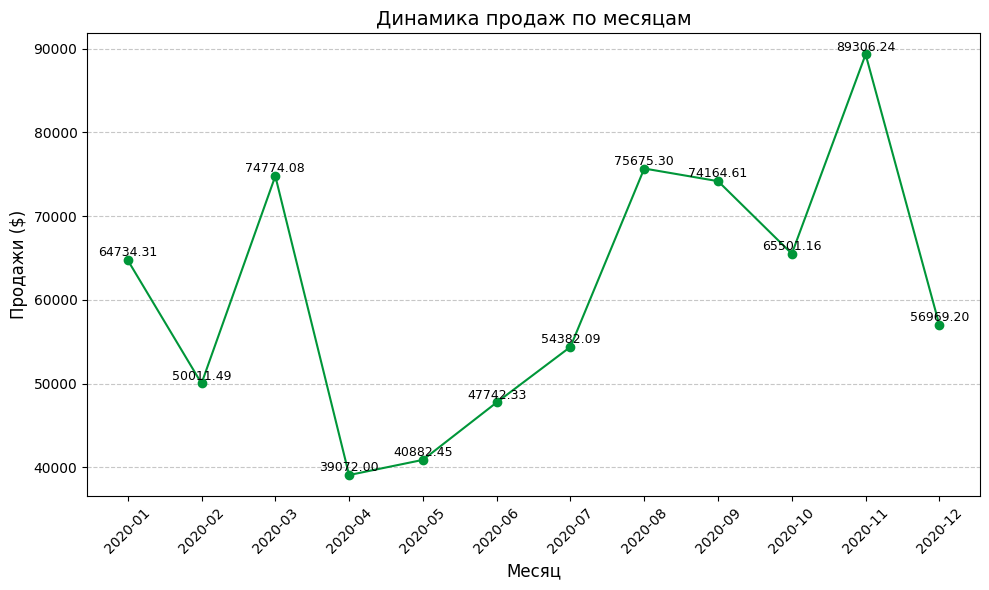


Транспонированная таблица (Продажи):
      0        1        2        3        4        5        6        7        8        9        10       11
 2020-01  2020-02  2020-03  2020-04  2020-05  2020-06  2020-07  2020-08  2020-09  2020-10  2020-11  2020-12
64734.31 50011.49 74774.08 39072.00 40882.45 47742.33 54382.09 75675.30 74164.61 65501.16 89306.24 56969.20


In [25]:
# Убедимся, что 'orderDate' в формате datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Группировка данных по месяцам и суммирование Sales (замените на правильное название столбца)
sales_monthly_sums = df.groupby(df['orderDate'].dt.to_period('M'))['sales'].sum()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(sales_monthly_sums.index.astype(str), sales_monthly_sums.values, color='#009639', marker='o')
plt.title('Динамика продаж по месяцам', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Продажи ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Добавление подписей к точкам
for i, value in enumerate(sales_monthly_sums.values):
    plt.text(sales_monthly_sums.index.astype(str)[i], value + 100, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Создание таблицы для представления данных
sales_table = pd.DataFrame({
    'Месяц': sales_monthly_sums.index.astype(str),
    'Продажи ($)': sales_monthly_sums.values
})

# Транспонирование таблицы
transposed_table = sales_table.T

# Вывод транспонированной таблицы
print("\nТранспонированная таблица (Продажи):")
print(transposed_table.to_string(index=False))


1. Общий тренд
Динамика продаж за 2020 год демонстрирует значительные колебания. Продажи варьируются от 39072.00 $ (в апреле) до 89306.24 $ (в ноябре), что указывает на сезонность и влияние внешних факторов.

2. Пики продаж
Март (74774.08 $): Первый пик активности, вероятно связанный с началом весеннего сезона или маркетинговыми кампаниями.

Ноябрь (89306.24 $): Наивысший пик продаж, что может быть связано с праздничными распродажами, такими как Черная пятница.

Август и сентябрь (75675.30 $ и 74164.61 $): Продажи остаются высокими, что может быть связано с подготовкой к осенним распродажам.

3. Спады
Апрель (39072.00 $): После мартовского пика наблюдается резкое снижение продаж, вероятно из-за окончания весенних акций или влияния внешних факторов.

Декабрь (56969.20 $): Снижение активности после ноябрьского максимума, возможно, связано с завершением праздничных распродаж.

4. Восстановление
После апрельского спада продажи постепенно восстанавливаются, достигая второго пика в ноябре.

Рекомендации
Усилить маркетинг в периоды спада (апрель и декабрь):

Провести акции и стимулировать спрос в эти месяцы.

Рассмотреть возможность внедрения скидок или программ лояльности.

Оптимизация логистики в периоды пиковых нагрузок:

Ноябрь требует особого внимания к управлению запасами и доставке товаров.

Анализ факторов роста:

Провести детальный анализ причин роста продаж в марте, августе и ноябре для использования этих данных в планировании будущих кампаний.

**Вывод**
Динамика продаж за 2020 год демонстрирует четкие сезонные тренды, которые можно использовать для оптимизации маркетинговых и операционных стратегий компании.

### 2.6 Распределение продаж по категории заказов

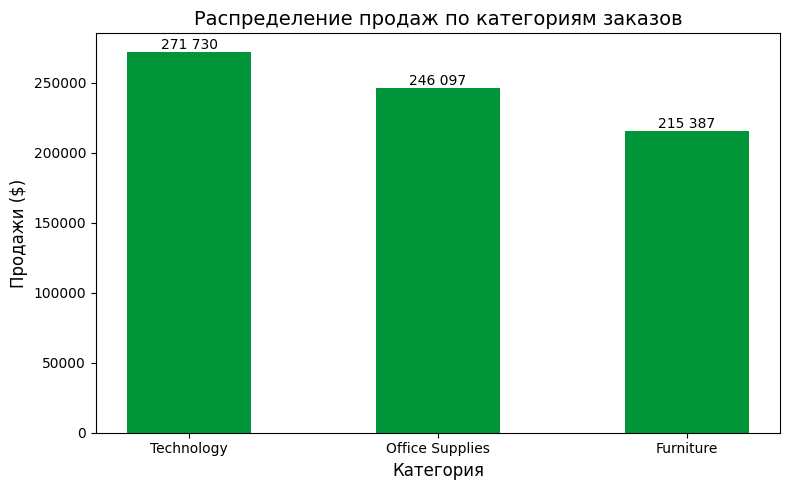

In [26]:
import matplotlib.pyplot as plt

# Группировка данных по категориям и суммирование продаж с сортировкой DESC
sales_by_category = df.groupby('category')['sales'].sum().sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(8, 5))
bars = plt.bar(sales_by_category.index, sales_by_category.values, color='#009639', width=0.5)
plt.title('Распределение продаж по категориям заказов', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Продажи ($)', fontsize=12)
plt.xticks(rotation=0)

# Добавление подписей к столбцам с разделителем разрядов
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=10)

# Убираем линии сетки
plt.grid(False)

plt.tight_layout()
plt.show()


Анализ распределения продаж по категориям заказов
Основные выводы:
Лидирующая категория: Technology

Продажи в категории "Technology" составляют 271 730 $, что делает её самой прибыльной категорией.

Высокий спрос на технологическую продукцию может быть связан с её актуальностью и востребованностью.

Второе место: Office Supplies

Продажи в категории "Office Supplies" составляют 246 097 $.

Эта категория также демонстрирует высокий уровень продаж, что может быть обусловлено стабильным спросом на офисные принадлежности.

Замыкает тройку: Furniture

Категория "Furniture" имеет продажи в размере 215 387 $.

Несмотря на то, что она занимает третье место, разрыв с другими категориями незначителен.

Рекомендации:
Усилить маркетинг для категории "Technology":

Провести дополнительные акции и рекламные кампании для увеличения продаж в лидирующей категории.

Оптимизировать продажи в категории "Furniture":

Провести анализ ассортимента мебели, чтобы выявить наиболее популярные товары и усилить их продвижение.

Поддерживать стабильный спрос на "Office Supplies":

Сосредоточиться на удержании текущих клиентов, предлагая программы лояльности или скидки на повторные заказы.

**Общий вывод:**
Категории "Technology", "Office Supplies" и "Furniture" демонстрируют высокие продажи с небольшими различиями между ними. Это указывает на сбалансированное распределение спроса, что является положительным фактором для компании.

### 2.7 Распределение продаж по штатам и городам

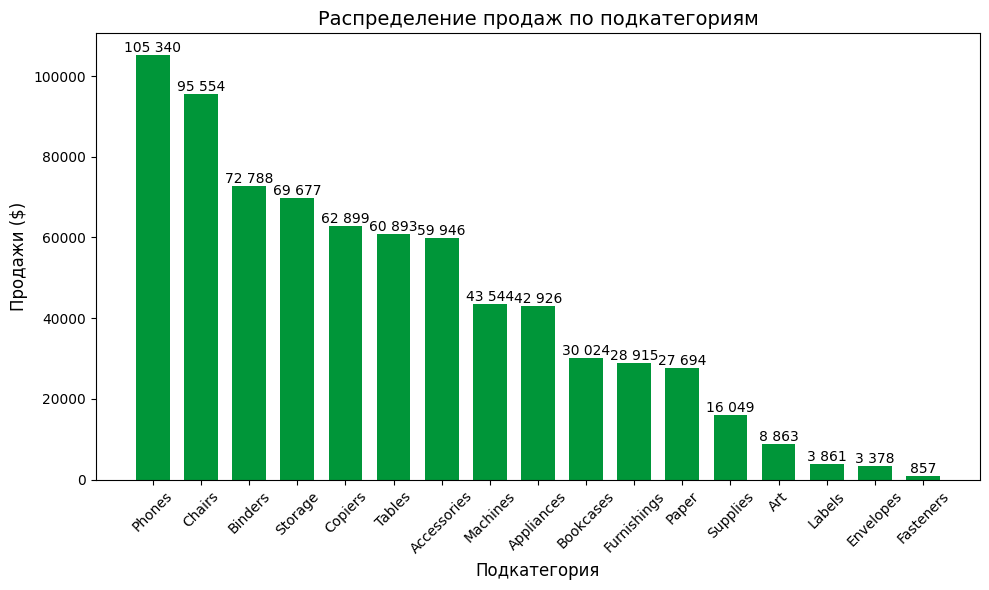


Таблица распределения продаж по подкатегориям:
Подкатегория  Продажи ($)
      Phones    105340.52
      Chairs     95554.35
     Binders     72788.04
     Storage     69677.62
     Copiers     62899.39
      Tables     60893.54
 Accessories     59946.23
    Machines     43544.68
  Appliances     42926.93
   Bookcases     30024.28
 Furnishings     28915.09
       Paper     27694.72
    Supplies     16049.41
         Art      8863.07
      Labels      3861.22
   Envelopes      3378.57
   Fasteners       857.59


In [27]:
# Группировка данных по подкатегориям и суммирование продаж с сортировкой DESC
sales_by_subcategory = df.groupby('subCategory')['sales'].sum().sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_subcategory.index, sales_by_subcategory.values, color='#009639', width=0.7)
plt.title('Распределение продаж по подкатегориям', fontsize=14)
plt.xlabel('Подкатегория', fontsize=12)
plt.ylabel('Продажи ($)', fontsize=12)
plt.xticks(rotation=45)

# Добавление подписей к столбцам с разделителем разрядов
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Создание таблицы для представления данных
subcategory_sales_table = pd.DataFrame({
    'Подкатегория': sales_by_subcategory.index,
    'Продажи ($)': sales_by_subcategory.values
})

# Вывод таблицы в консоль
print("\nТаблица распределения продаж по подкатегориям:")
print(subcategory_sales_table.to_string(index=False))


**Основные выводы:**
Лидеры продаж:

Phones — абсолютный лидер с продажами в размере 105 340 $. Это указывает на высокий спрос на мобильные устройства, что может быть связано с их необходимостью в повседневной жизни и регулярным обновлением моделей.

Chairs занимают второе место с продажами в размере 95 554 $, что свидетельствует о стабильном спросе на офисную мебель, особенно в условиях увеличения числа удалённых рабочих мест.

Binders (72 788 $) и Storage (69 677 $) также демонстрируют значительные продажи, что может быть связано с потребностями офисов и образовательных учреждений.

Средние продажи:

Категории, такие как Copiers (62 899 $), Tables (60 893 $), и Accessories (59 946 $), показывают умеренные результаты. Это может быть связано с их узкой целевой аудиторией или меньшей частотой покупок.

Низкие продажи:

Категории, такие как Labels (3 861 $), Envelopes (3 378 $), и Fasteners (857 $), демонстрируют минимальные показатели. Это может быть связано с их низкой стоимостью или снижением актуальности в современном цифровом мире.

Рекомендации:
Усилить маркетинг для лидеров продаж:

Провести дополнительные рекламные кампании для категории "Phones", чтобы закрепить лидерство.

Рассмотреть возможность продвижения "Chairs" через акции для корпоративных клиентов.

Оптимизация ассортимента:

Провести анализ ассортимента категорий с низкими продажами (Labels, Envelopes, Fasteners) и рассмотреть возможность их замены более востребованными товарами.

Увеличить продажи средних категорий:

Разработать стратегию продвижения для категорий "Copiers", "Tables" и "Accessories", включая скидки или программы лояльности.

**Общий вывод:**
Распределение продаж по подкатегориям показывает, что основная прибыль сосредоточена в нескольких ключевых категориях, таких как "Phones" и "Chairs". Для повышения общей эффективности компании Amazon следует сосредоточиться на усилении лидеров продаж, оптимизации ассортимента и увеличении спроса на товары средней популярности.

### 2.8 Самые популярные товары (Product Name)

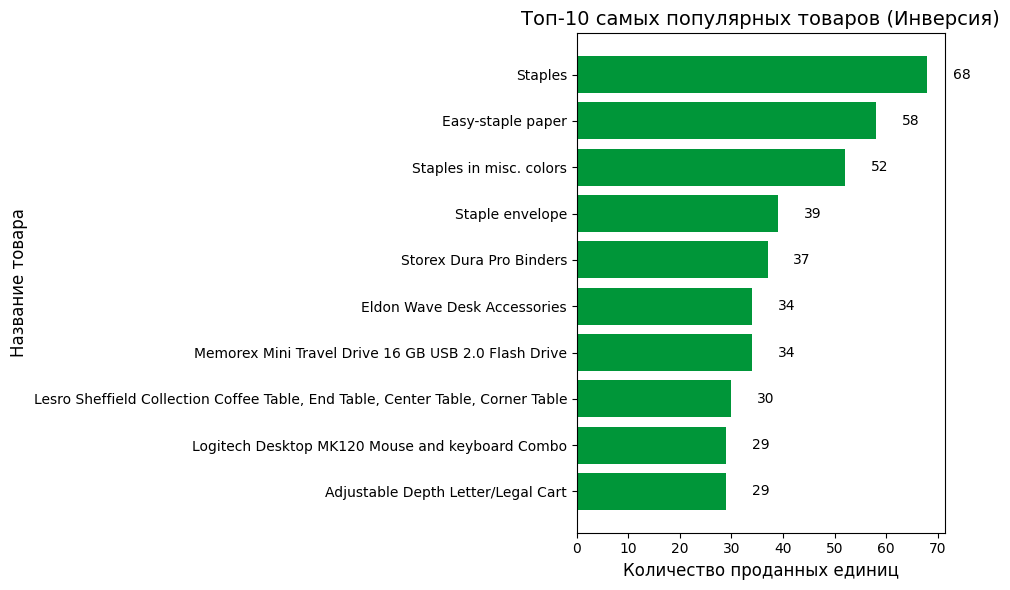


Таблица Топ-10 самых популярных товаров:
                                                               Название товара  Количество проданных единиц
                                                                       Staples                           68
                                                             Easy-staple paper                           58
                                                       Staples in misc. colors                           52
                                                               Staple envelope                           39
                                                       Storex Dura Pro Binders                           37
                                                   Eldon Wave Desk Accessories                           34
                           Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive                           34
Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table                

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Группировка данных по названиям товаров и подсчёт количества продаж с сортировкой DESC
popular_products = df.groupby('productName')['quantity'].sum().sort_values(ascending=False).head(10)

# Инверсия порядка данных для графика
popular_products_inverted = popular_products[::-1]

# Построение графика
plt.figure(figsize=(10, 6))
bars = plt.barh(popular_products_inverted.index, popular_products_inverted.values, color='#009639')  # Горизонтальный график
plt.title('Топ-10 самых популярных товаров (Инверсия)', fontsize=14)
plt.xlabel('Количество проданных единиц', fontsize=12)
plt.ylabel('Название товара', fontsize=12)

# Добавление подписей к столбцам с разделителем разрядов
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f'{int(width):,}'.replace(',', ' '), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Создание таблицы для представления данных (без изменений)
popular_products_table = pd.DataFrame({
    'Название товара': popular_products.index,
    'Количество проданных единиц': popular_products.values
})

# Вывод таблицы в консоль
print("\nТаблица Топ-10 самых популярных товаров:")
print(popular_products_table.to_string(index=False))


Анализ самых популярных товаров: Amazon
Основные выводы:
Лидеры продаж:

Staples — абсолютный лидер с количеством проданных единиц 68. Это указывает на стабильный спрос на базовые офисные принадлежности, которые являются необходимыми для большинства клиентов.

Easy-staple paper (58 единиц) и Staples in misc. colors (52 единицы) также занимают высокие позиции, что подтверждает популярность товаров для повседневного использования в офисах.

Средние продажи:

Товары, такие как Staple envelope (39 единиц) и Storex Dura Pro Binders (37 единиц), демонстрируют умеренные результаты. Это может быть связано с их узкой целевой аудиторией или меньшей частотой покупок.

Низкие продажи среди топ-10:

Товары, такие как Adjustable Depth Letter/Legal Cart и Logitech Desktop MK120 Mouse and keyboard Combo, имеют продажи в размере 29 единиц, что указывает на их специфическую нишу.

Рекомендации:
Усилить маркетинг для лидеров продаж:

Провести дополнительные акции для категории "Staples", чтобы закрепить лидерство.

Рассмотреть возможность увеличения ассортимента товаров в этой категории, включая новые цветовые варианты и упаковки.

Оптимизация ассортимента:

Провести анализ спроса на товары с низкими продажами (например, "Adjustable Depth Letter/Legal Cart") и рассмотреть возможность их замены более востребованными продуктами.

Увеличение продаж средних категорий:

Разработать стратегию продвижения для товаров, таких как "Storex Dura Pro Binders" и "Staple envelope", включая скидки или программы лояльности.

Общий вывод:
Распределение самых популярных товаров показывает, что основная прибыль сосредоточена в базовых офисных принадлежностях, таких как "Staples" и "Easy-staple paper". Для повышения общей эффективности компании Amazon следует сосредоточиться на усилении лидеров продаж, оптимизации ассортимента и увеличении спроса на товары средней популярности.

### 2.9 Распределение категорий внутри городов (штатам)



<Figure size 1200x600 with 0 Axes>

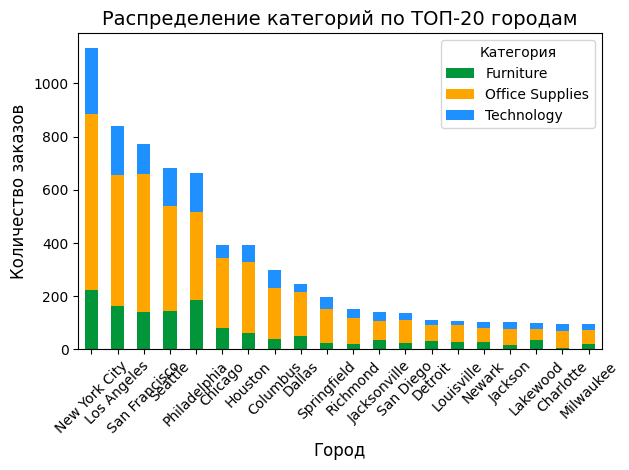

In [29]:
import pandas as pd

# Группировка данных по городам и категориям для подсчета количества заказов
category_city_distribution = df.groupby(['city', 'category'])['quantity'].sum().unstack()

# Заполнение пропущенных значений нулями
category_city_distribution = category_city_distribution.fillna(0).astype(int)


import matplotlib.pyplot as plt

# Отбор ТОП-20 городов по общему количеству заказов
top_cities = category_city_distribution.sum(axis=1).sort_values(ascending=False).head(20)
top_cities_distribution = category_city_distribution.loc[top_cities.index]

# Построение графика только для ТОП-20 городов
plt.figure(figsize=(12, 6))
top_cities_distribution.plot(kind='bar', stacked=True, color=['#009639', '#FFA500', '#1E90FF'])
plt.title('Распределение категорий по ТОП-20 городам', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Категория')
plt.tight_layout()
plt.show()





Анализ распределения категорий по ТОП-20 городам
Основные выводы:
Города-лидеры:

New York City — абсолютный лидер с более чем 1000 заказов. Основной вклад в продажи вносят категории Technology и Office Supplies, что указывает на высокий спрос на технологические товары и офисные принадлежности.

Los Angeles и San Francisco занимают второе и третье места с примерно 800–900 заказами. В этих городах также доминируют категории Technology и Office Supplies, что может быть связано с высокой концентрацией бизнеса и корпоративных клиентов.

Средние города:

Города, такие как Philadelphia, Houston, и Columbus, демонстрируют умеренные показатели (400–600 заказов). Здесь наблюдается сбалансированное распределение между категориями, что говорит о разнообразии потребностей клиентов.

Города с низкой активностью:

Города, такие как Milwaukee, Charlotte, и Lakewood, имеют минимальное количество заказов (менее 200). Это может быть связано с меньшей плотностью населения или ограниченной корпоративной активностью.

Распределение по категориям:
Technology:

Лидирующая категория в большинстве городов, особенно в мегаполисах, таких как New York City и Los Angeles. Высокий спрос на технологические товары связан с их необходимостью для бизнеса и личного использования.

Office Supplies:

Вторая по популярности категория, особенно в крупных городах. Это объясняется стабильным спросом на офисные принадлежности среди корпоративных клиентов.

Furniture:

Наименее популярная категория, однако она играет значительную роль в городах с высоким уровнем корпоративной активности, таких как Houston и Philadelphia.

Рекомендации:
Усилить маркетинг в городах-лидерах:

Провести целевые рекламные кампании для категорий "Technology" и "Office Supplies" в New York City, Los Angeles и San Francisco.

Развивать продажи в городах со средней активностью:

Внедрить программы лояльности или скидки для клиентов в Philadelphia, Houston и Columbus, чтобы увеличить количество заказов.

Оптимизировать стратегию для малых городов:

Провести анализ спроса в Milwaukee, Charlotte и Lakewood, чтобы понять причины низкой активности и разработать стратегию её увеличения.

Общий вывод:
Динамика распределения категорий по ТОП-20 городам показывает, что основная активность сосредоточена в крупных мегаполисах с доминированием категорий "Technology" и "Office Supplies". Для повышения эффективности продаж Amazon следует сосредоточиться на развитии лидирующих городов, поддержании стабильного спроса в средних городах и стимулировании активности в малых населённых пунктах.

### 2.10 Динамика продаж внутри категорий

<Figure size 1200x600 with 0 Axes>

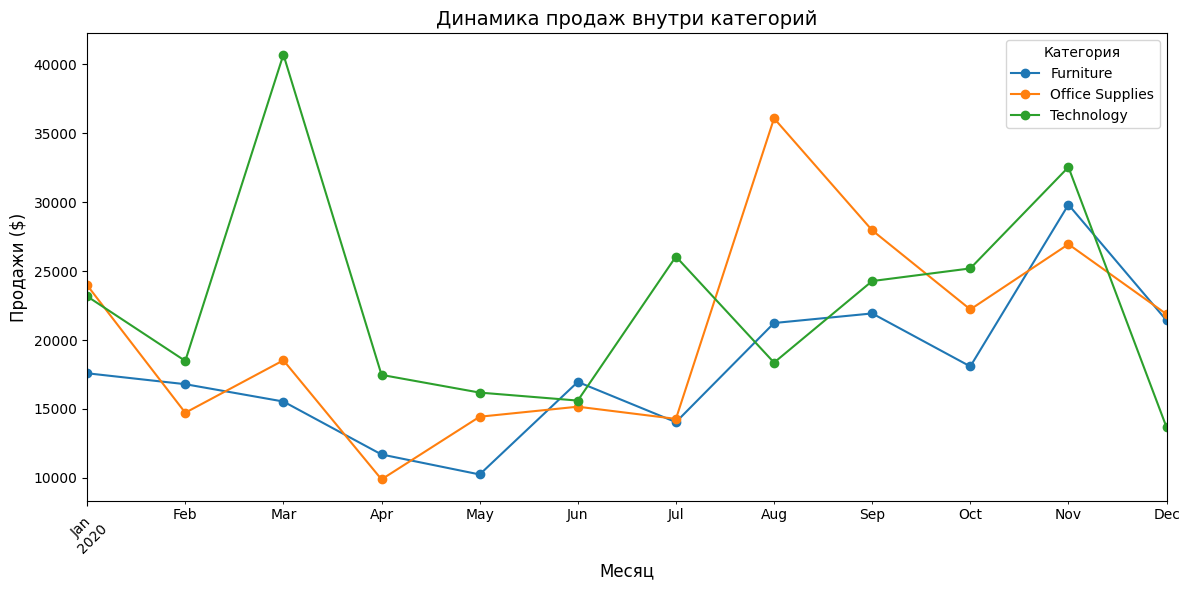


Таблица динамики продаж внутри категорий:
orderDate  Furniture  Office Supplies  Technology
  2020-01   17590.71         23972.73    23170.87
  2020-02   16798.97         14727.49    18485.03
  2020-03   15541.39         18531.48    40701.21
  2020-04   11702.16          9896.41    17473.43
  2020-05   10252.85         14440.13    16189.47
  2020-06   16963.84         15167.26    15611.22
  2020-07   14045.94         14282.15    26054.00
  2020-08   21234.75         36076.82    18363.74
  2020-09   21929.74         27957.29    24277.58
  2020-10   18086.37         22220.13    25194.66
  2020-11   29817.71         26949.73    32538.80
  2020-12   21422.84         21875.55    13670.80


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Убедимся, что 'orderDate' в формате datetime
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Группировка данных по месяцам и категориям для расчета месячных продаж
sales_by_category = df.groupby([df['orderDate'].dt.to_period('M'), 'category'])['sales'].sum().unstack()

# Построение графика динамики продаж внутри категорий
plt.figure(figsize=(12, 6))
sales_by_category.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Динамика продаж внутри категорий', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Продажи ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Категория')
plt.tight_layout()
plt.show()

# Вывод таблицы динамики продаж внутри категорий
sales_by_category.reset_index(inplace=True)
print("\nТаблица динамики продаж внутри категорий:")
print(sales_by_category.to_string(index=False))


Анализ динамики продаж внутри категорий
Основные выводы:
Категория "Technology":

Лидирует в марте с максимальными продажами 40 000 $, что может быть связано с повышенным спросом на технологические товары в начале года.

После резкого спада в апреле наблюдается восстановление, достигая второго пика в сентябре (35 000 $).

Ноябрь также демонстрирует высокий уровень продаж (30 000 $), что может быть связано с праздничными распродажами.

Категория "Office Supplies":

Продажи стабильны в течение года, но достигают максимума в августе (36 000 $). Это может быть связано с подготовкой к учебному сезону.

В ноябре наблюдается второй пик активности (32 000 $), вероятно, благодаря корпоративным закупкам перед праздниками.

Категория "Furniture":

Продажи остаются относительно стабильными, с небольшими колебаниями.

Максимум достигается в ноябре (25 000 $), что может быть связано с обновлением офисной мебели перед новогодними праздниками.

Рекомендации:
Усилить маркетинг для категории "Technology":

Провести акции и рекламные кампании в марте, сентябре и ноябре, чтобы закрепить лидерство этой категории.

Рассмотреть возможность увеличения ассортимента популярных товаров.

Поддерживать стабильный спрос на "Office Supplies":

Сосредоточиться на удержании корпоративных клиентов через программы лояльности и скидки на массовые закупки.

Оптимизация продаж категории "Furniture":

Провести анализ ассортимента, чтобы выявить наиболее востребованные товары и усилить их продвижение.

Общий вывод:
Динамика продаж внутри категорий показывает чёткие сезонные тренды. Для повышения эффективности компании Amazon следует сосредоточиться на усилении маркетинговых активностей в ключевые месяцы (март, август, сентябрь и ноябрь) и оптимизации ассортимента для каждой категории.

## 3. Выводы



Обзор итогов проведенного анализа продаж за 2020 год:

1. Демографический охват:

* Все 3312 пользователей находятся в США, с концентрацией в западном (33%) и восточном (28%) регионах.

* Ключевые штаты: Калифорния (20%), Нью-Йорк и Техас.

* Основные города: Нью-Йорк, Лос-Анджелес, Сан-Франциско.

2. Динамика продаж:

* Пики: ноябрь ($89,306), март ($74,774), август-сентябрь ($75,675).

* Спады: апрель ($39,072), декабрь ($56,969).

* Явная сезонность с влиянием праздников и учебного года.

3. Категории товаров:

* Лидер: Technology ($271,730)

* Второе место: Office Supplies ($246,097)

* Третье место: Furniture ($215,387)

4. Популярные товары:

* Лидеры: Staples (68 ед.), Easy-staple paper (58 ед.), Staples in misc. colors (52 ед.)

* Фокус на базовых офисных принадлежностях

5. Городская специфика:

* Крупные города (Нью-Йорк, Лос-Анджелес) предпочитают Technology и Office Supplies.

* Средние города показывают более равномерное распределение категорий.

**Рекомендации:**

1. Усилить маркетинг в ключевые месяцы: март, август, сентябрь, ноябрь.

2. Оптимизировать логистику для пиковых периодов.

3. Расширить ассортимент и акции в категории Technology.

4. Разработать стратегии удержания корпоративных клиентов для Office Supplies.

5. Провести анализ и обновление ассортимента Furniture.

6. Сфокусироваться на развитии продаж в средних городах.

7. Разработать специальные предложения для малоактивных регионов.

Эти меры помогут укрепить позиции Amazon на рынке и повысить эффективность продаж в различных категориях и регионах.